In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Question 01 - Linear regression impact on outliers

In [2]:
x = np.arange(10)
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])
print(x)
print(y)
#print(x.shape)
x_reshaped = x.reshape(-1,1)
#print(x.shape)
#print(y.shape)
y_reshaped = y.reshape(-1,1)
#print(y.shape)

[0 1 2 3 4 5 6 7 8 9]
[ 20.26   5.61   3.14 -30.   -40.    -8.13 -11.73 -16.08 -19.95 -24.03]


### linear regression model using built-in functions

w0 = [3.91672727]
w1 = [-3.55727273]


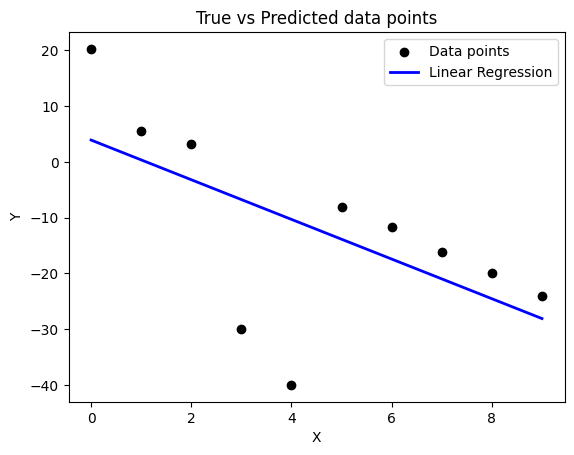

In [3]:
model = LinearRegression()
model.fit(x_reshaped, y_reshaped)
print("w0 = " + str(model.intercept_))
print("w1 = " + str(model.coef_[0]))

y_predicted = model.predict(x_reshaped)
plt.scatter(x_reshaped, y_reshaped, color="black", label='Data points')
plt.plot(x_reshaped, y_predicted, color="blue", linewidth=2, label=r'Linear Regression')

plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("True vs Predicted data points")
plt.show()



### linear regression model using $\hat{\beta} = (X^T X)^{-1}X^T y$ matrix method

In [4]:
ones_col = np.ones((x_reshaped.shape[0],1))
matX = np.hstack((ones_col,x_reshaped)) 
#print(matX)
matXT = matX.T
#print(matXT)
matXTX = np.dot(matXT,matX)
matXTX_inv = np.linalg.inv(matXTX)
matXTy = np.dot(matXT,y_reshaped)
result = np.dot(matXTX_inv,matXTy)
#print(result)
w0 = result[0][0]
w1 = result[1][0]
print("w0 = " + str(result[0]))
print("w1 = " + str(result[1]))


w0 = [3.91672727]
w1 = [-3.55727273]


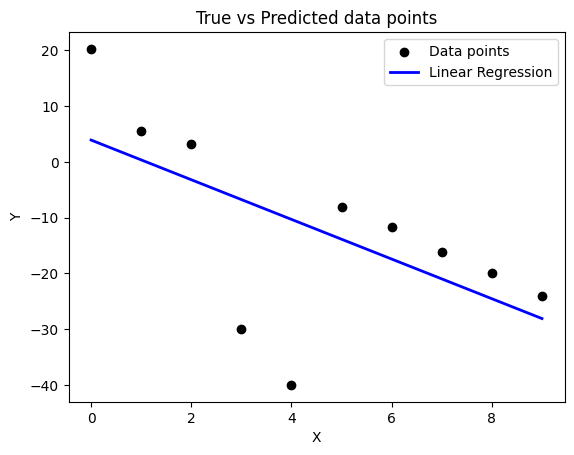

In [14]:
y_predicted = w0+(w1*x_reshaped)
plt.scatter(x_reshaped, y_reshaped, color="black", label='Data points')
plt.plot(x_reshaped, y_predicted, color="blue", linewidth=2, label=r'Linear Regression')

plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("True vs Predicted data points")
plt.show()

### Use the new loss function
$$L(\theta, \beta) = \frac{1}{N} \sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}$$
- Model 1: y = −4x + 12
- Model 2: y = −3.55x + 3.91

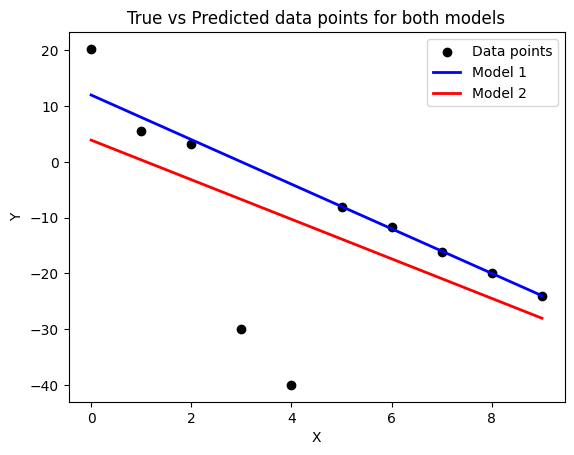

In [22]:
N = x_reshaped.shape[0]
beta_vals = [1,10**(-6),10**3]
def loss_calc(y_true, y_estimate,beta):
    squared_diff = (y_true-y_estimate)**2
    return squared_diff/(squared_diff + beta**2)

y_predicted_model_1 = 12+((-4)*x_reshaped)
y_predicted_model_2 = 3.91+((-3.55)*x_reshaped)

plt.scatter(x_reshaped, y_reshaped, color="black", label='Data points')
plt.plot(x_reshaped, y_predicted_model_1, color="blue", linewidth=2, label=r'Model 1')
plt.plot(x_reshaped, y_predicted_model_2, color="red", linewidth=2, label=r'Model 2')

plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("True vs Predicted data points for both models")
plt.show()


### Calculate the loss function for model 1

In [18]:
for beta in beta_vals:
    total = 0
    for i in range(10):
        total += loss_calc(y_reshaped[i][0], y_predicted_model_1[i][0], beta)
    L = total / N
    print(f"for model = 1 and beta = {beta},        L = {L}")
print()

for model = 1 and beta = 1,        L = 0.435416262490386
for model = 1 and beta = 1e-06,        L = 0.9999999998258206
for model = 1 and beta = 1000,        L = 0.0002268287498440988



### Calculate the loss function for model 2

In [23]:
for beta in beta_vals:
    total = 0
    for i in range(10):
        total += loss_calc(y_reshaped[i][0], y_predicted_model_2[i][0], beta)
    L = total / N
    print(f"for model = 2 and beta = {beta},        L = {L}")
print()

for model = 2 and beta = 1,        L = 0.9728470518681676
for model = 2 and beta = 1e-06,        L = 0.9999999999999718
for model = 2 and beta = 1000,        L = 0.00018824684654645654



# Question 02 - Loss Function

[0.990025 0.9801   0.9025   0.81     0.64     0.49     0.36     0.25
 0.16     0.09     0.04     0.01     0.      ]
[5.29831737e+00 4.60517019e+00 2.99573227e+00 2.30258509e+00
 1.60943791e+00 1.20397280e+00 9.16290732e-01 6.93147181e-01
 5.10825624e-01 3.56674944e-01 2.23143551e-01 1.05360516e-01
 9.99200722e-16]


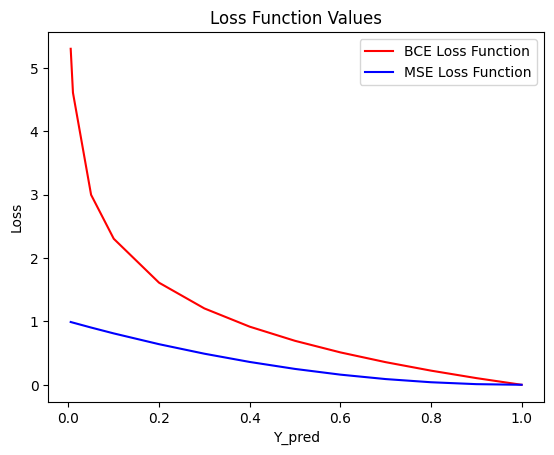

In [39]:
y_pred_vals = np.array([0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
y_true = 1

def calc_mse(y_pred):
    return (y_true-y_pred)**2

def calc_bce(y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))


mse_vals = np.array([calc_mse(x) for x in y_pred_vals])
bce_vals = np.array([calc_bce(x) for x in y_pred_vals])

print(mse_vals)
print(bce_vals)

plt.plot(y_pred_vals,bce_vals,color = "red", label = "BCE Loss Function")
plt.plot(y_pred_vals,mse_vals,color = "blue", label = "MSE Loss Function")

plt.legend(loc='best')
plt.xlabel('Y_pred')
plt.ylabel('Loss')
plt.title("Loss Function Values")
plt.show()


# Question 03 - Data Pre-Processing

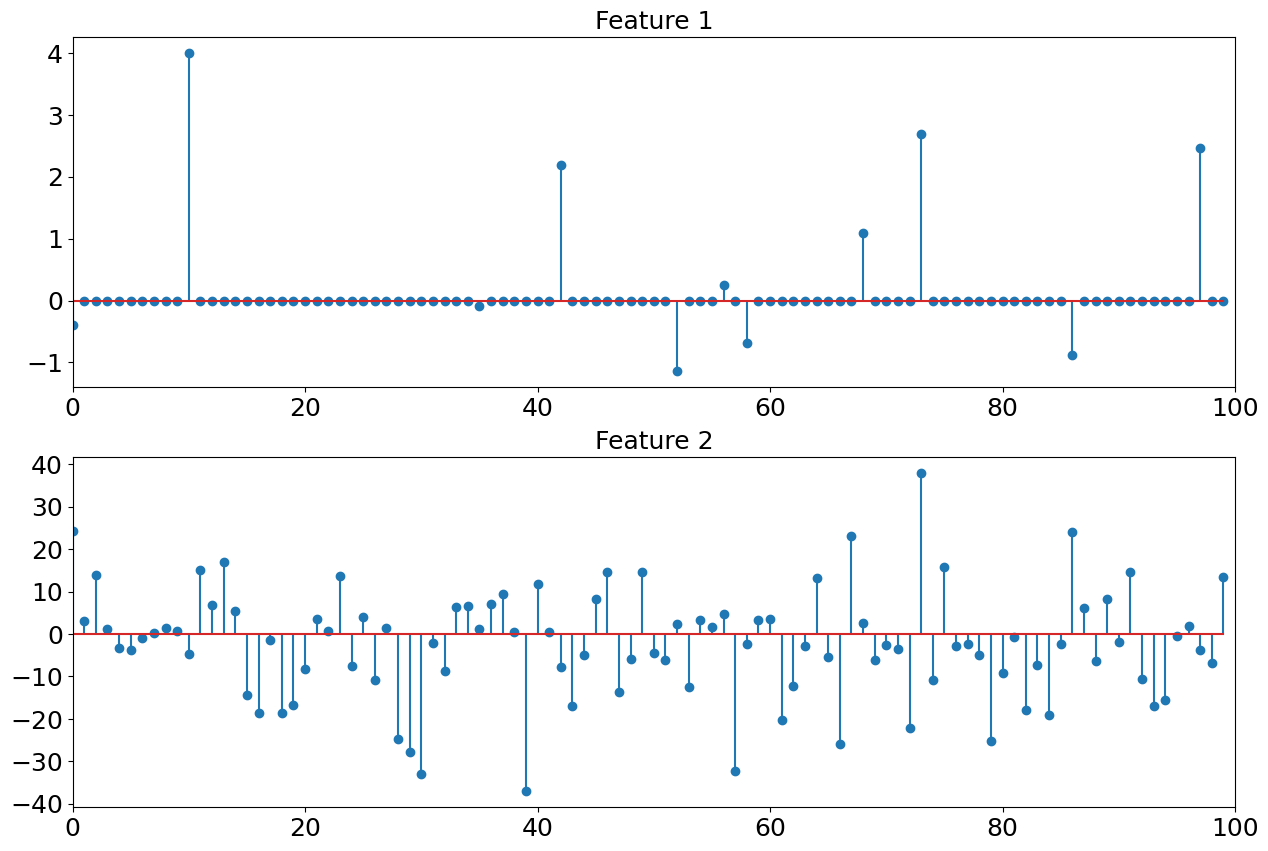

In [47]:
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal
your_index_no = 220675

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

sparse_signal = sparse_signal / 5
epsilon = np.random.normal(0, 15, signal_length)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

### Scalling using sklearn.preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# (a) Standard Scaling
std_scaler = StandardScaler()
sparse_std = std_scaler.fit_transform(sparse_signal.reshape(-1,1))
epsilon_std = std_scaler.fit_transform(epsilon.reshape(-1,1))

# (b) Min-Max Scaling
minmax_scaler = MinMaxScaler()
sparse_minmax = minmax_scaler.fit_transform(sparse_signal.reshape(-1,1))
epsilon_minmax = minmax_scaler.fit_transform(epsilon.reshape(-1,1))

# (c) Max-Abs Scaling
maxabs_scaler = MaxAbsScaler()
sparse_maxabs = maxabs_scaler.fit_transform(sparse_signal.reshape(-1,1))
epsilon_maxabs = maxabs_scaler.fit_transform(epsilon.reshape(-1,1))


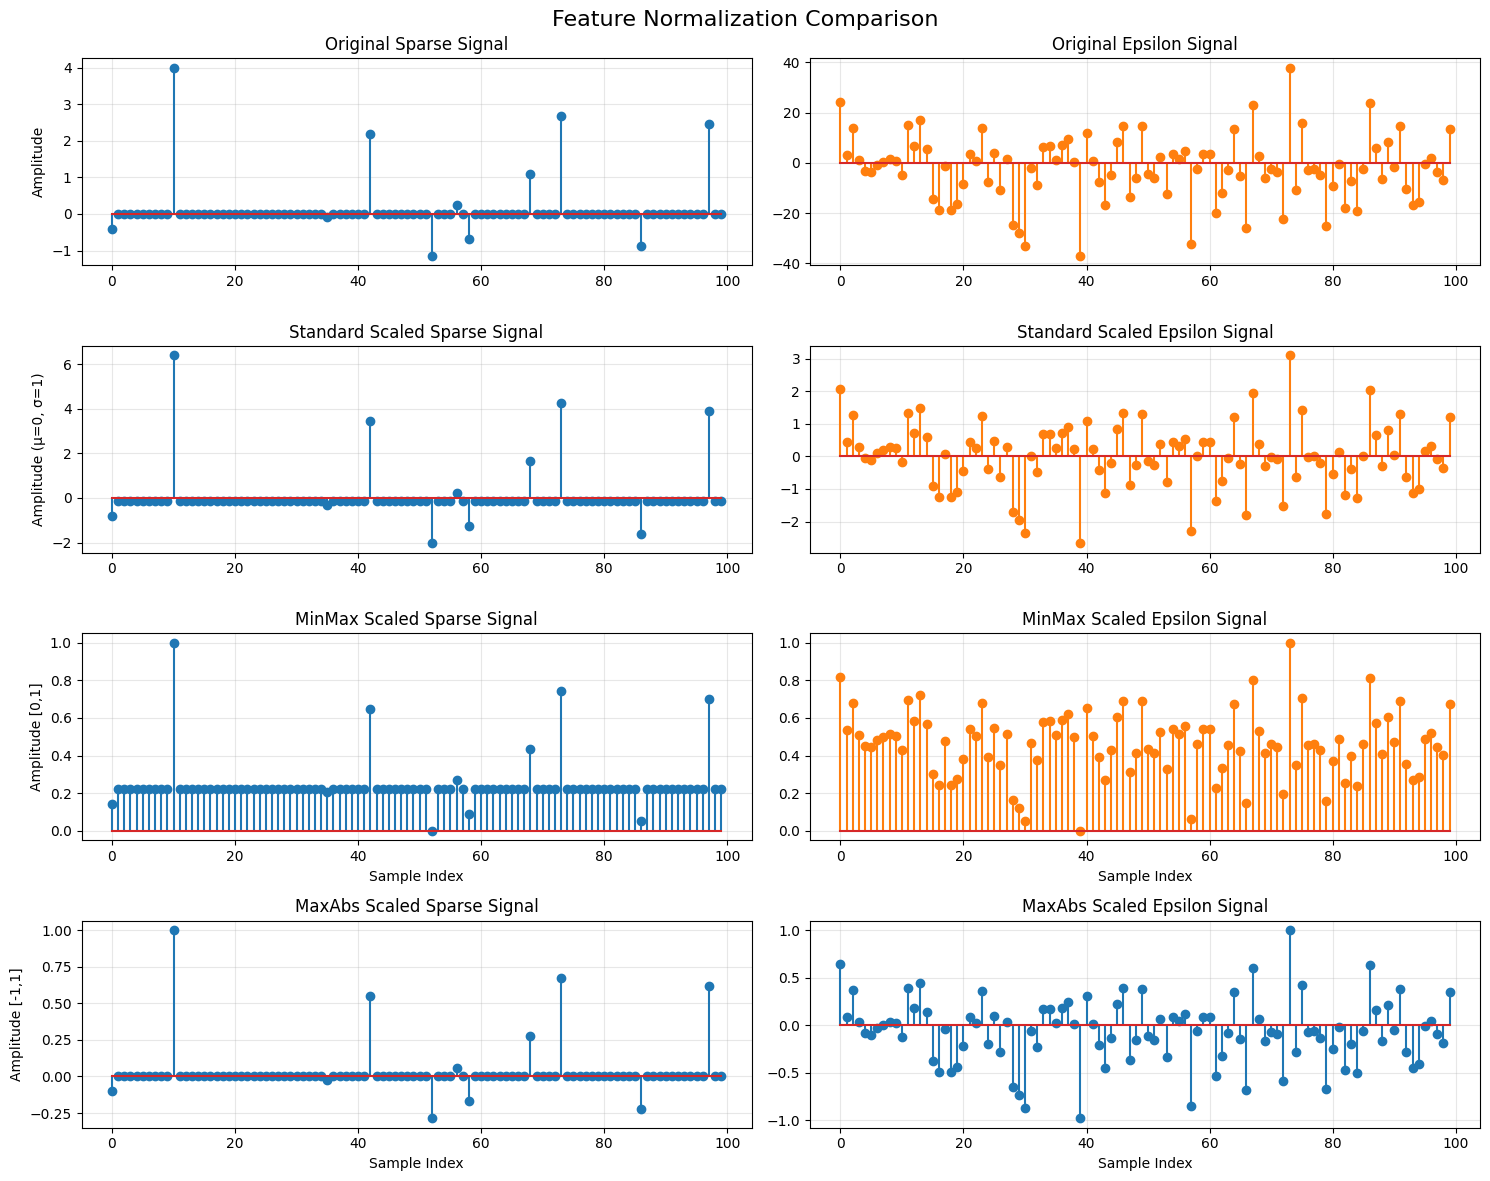

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle('Feature Normalization Comparison', fontsize=16)

# Plot original signals
axes[0,0].stem(sparse_signal, markerfmt='C0o', linefmt='C0-')
axes[0,0].set_title('Original Sparse Signal')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].stem(epsilon, markerfmt='C1o', linefmt='C1-')
axes[0,1].set_title('Original Epsilon Signal')
axes[0,1].grid(True, alpha=0.3)

# Plot Standard Scaled features
axes[1,0].stem(sparse_std, markerfmt='C0o', linefmt='C0-')
axes[1,0].set_title('Standard Scaled Sparse Signal')
axes[1,0].set_ylabel('Amplitude (μ=0, σ=1)')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].stem(epsilon_std, markerfmt='C1o', linefmt='C1-')
axes[1,1].set_title('Standard Scaled Epsilon Signal')
axes[1,1].grid(True, alpha=0.3)

# Plot MinMax Scaled features
axes[2,0].stem(sparse_minmax, markerfmt='C0o', linefmt='C0-')
axes[2,0].set_title('MinMax Scaled Sparse Signal')
axes[2,0].set_ylabel('Amplitude [0,1]')
axes[2,0].set_xlabel('Sample Index')
axes[2,0].grid(True, alpha=0.3)

axes[2,1].stem(epsilon_minmax, markerfmt='C1o', linefmt='C1-')
axes[2,1].set_title('MinMax Scaled Epsilon Signal')
axes[2,1].set_xlabel('Sample Index')
axes[2,1].grid(True, alpha=0.3)

# Plot MinMax Scaled features
axes[3,0].stem(sparse_maxabs, markerfmt='C0o', linefmt='C0-')
axes[3,0].set_title('MaxAbs Scaled Sparse Signal')
axes[3,0].set_ylabel('Amplitude [-1,1]')
axes[3,0].set_xlabel('Sample Index')
axes[3,0].grid(True, alpha=0.3)

axes[3,1].stem(epsilon_maxabs, markerfmt='C1o', linefmt='C1-')
axes[3,1].set_title('MaxAbs Scaled Epsilon Signal')
axes[3,1].set_xlabel('Sample Index')
axes[3,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


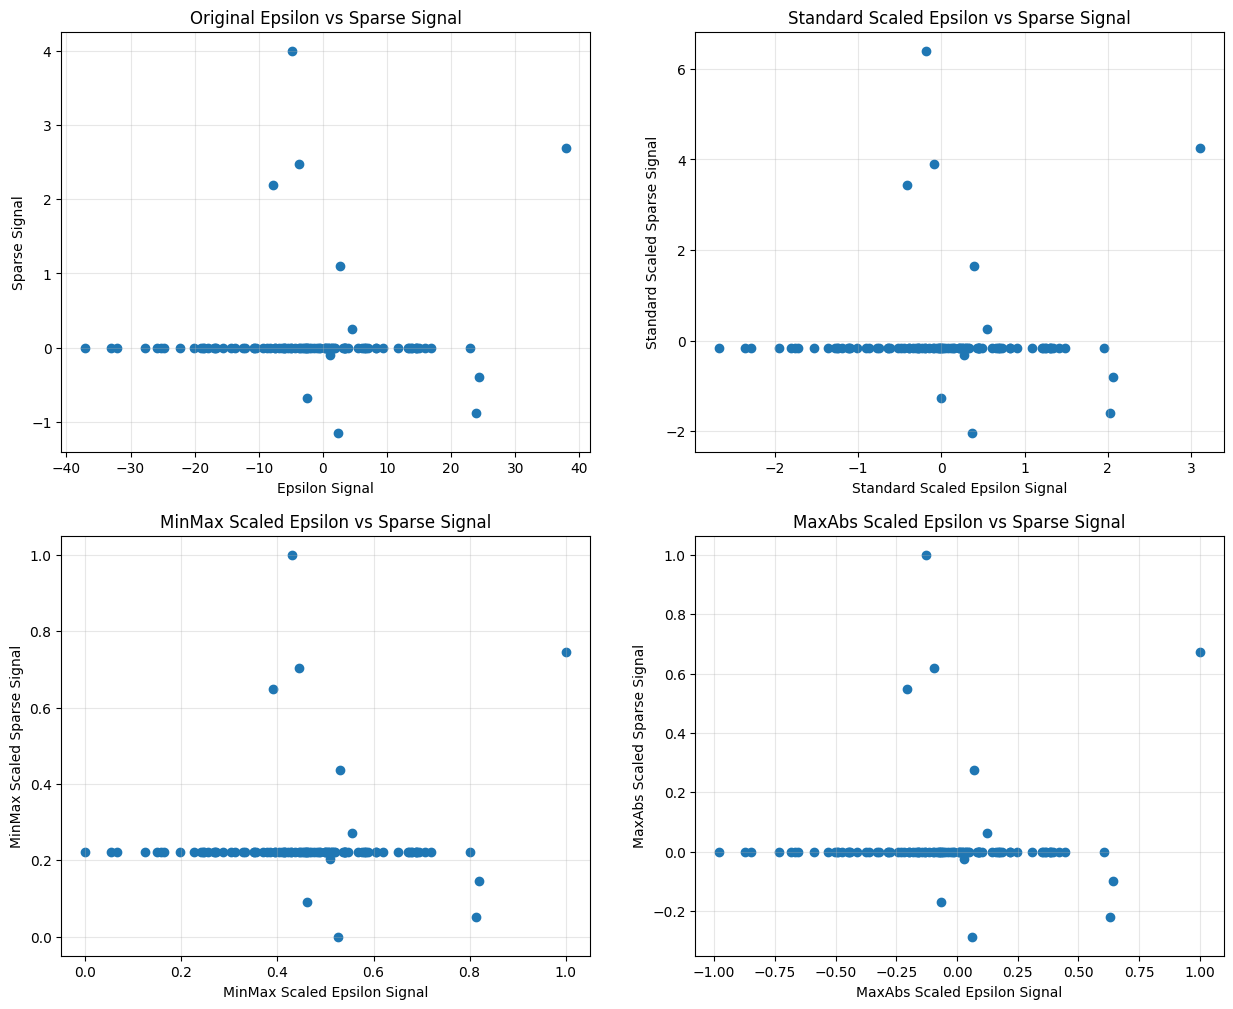

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].scatter(epsilon, sparse_signal)
axes[0,0].set_title('Original Epsilon vs Sparse Signal')
axes[0,0].set_xlabel('Epsilon Signal')
axes[0,0].set_ylabel('Sparse Signal')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(epsilon_std, sparse_std)
axes[0,1].set_title('Standard Scaled Epsilon vs Sparse Signal')
axes[0,1].set_xlabel('Standard Scaled Epsilon Signal')
axes[0,1].set_ylabel('Standard Scaled Sparse Signal')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].scatter(epsilon_minmax, sparse_minmax)
axes[1,0].set_title('MinMax Scaled Epsilon vs Sparse Signal')
axes[1,0].set_xlabel('MinMax Scaled Epsilon Signal')
axes[1,0].set_ylabel('MinMax Scaled Sparse Signal')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(epsilon_maxabs, sparse_maxabs)
axes[1,1].set_title('MaxAbs Scaled Epsilon vs Sparse Signal')
axes[1,1].set_xlabel('MaxAbs Scaled Epsilon Signal')
axes[1,1].set_ylabel('MaxAbs Scaled Sparse Signal')
axes[1,1].grid(True, alpha=0.3)


### Scalling using the definition

In [61]:
sparse_mean = np.mean(sparse_signal)
sparse_std = np.std(sparse_signal)
epsilon_mean = np.mean(epsilon)
epsilon_std = np.std(epsilon)

sparse_signal_min = np.min(sparse_signal)
sparse_signal_max = np.max(sparse_signal)
epsilon_min = np.min(epsilon)
epsilon_max = np.max(epsilon)

sparse_signal_max_abs_val = np.max(np.abs(sparse_signal))
epsilon_max_abs_val = np.max(np.abs(epsilon))


sparse_std = (sparse_signal-sparse_mean)/sparse_std
epsilon_std = (epsilon-epsilon_mean)/epsilon_std

sparse_minmax = (sparse_signal - sparse_signal_min) / (sparse_signal_max - sparse_signal_min)
epsilon_minmax = (epsilon - epsilon_min) / (epsilon_max - epsilon_min)

sparse_maxabs = sparse_signal / sparse_signal_max_abs_val
epsilon_maxabs = epsilon / epsilon_max_abs_val

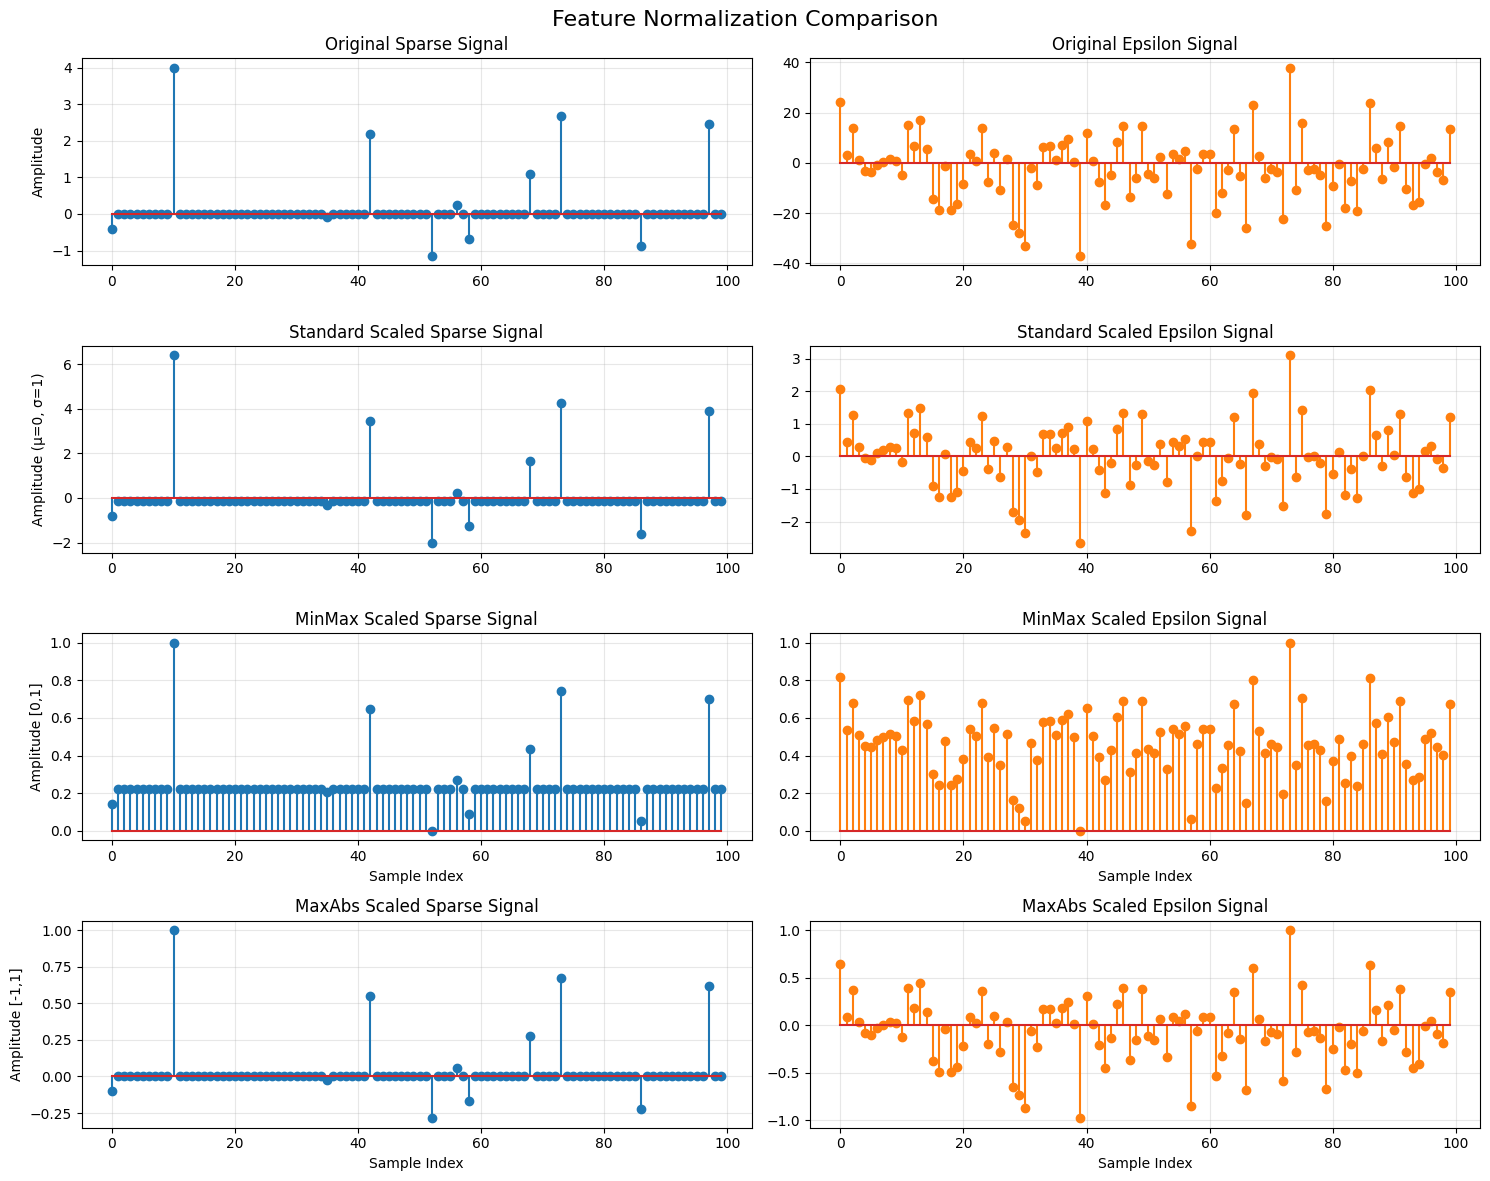

In [62]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle('Feature Normalization Comparison', fontsize=16)

# Plot original signals
axes[0,0].stem(sparse_signal, markerfmt='C0o', linefmt='C0-')
axes[0,0].set_title('Original Sparse Signal')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].stem(epsilon, markerfmt='C1o', linefmt='C1-')
axes[0,1].set_title('Original Epsilon Signal')
axes[0,1].grid(True, alpha=0.3)

# Plot Standard Scaled features
axes[1,0].stem(sparse_std, markerfmt='C0o', linefmt='C0-')
axes[1,0].set_title('Standard Scaled Sparse Signal')
axes[1,0].set_ylabel('Amplitude (μ=0, σ=1)')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].stem(epsilon_std, markerfmt='C1o', linefmt='C1-')
axes[1,1].set_title('Standard Scaled Epsilon Signal')
axes[1,1].grid(True, alpha=0.3)

# Plot MinMax Scaled features
axes[2,0].stem(sparse_minmax, markerfmt='C0o', linefmt='C0-')
axes[2,0].set_title('MinMax Scaled Sparse Signal')
axes[2,0].set_ylabel('Amplitude [0,1]')
axes[2,0].set_xlabel('Sample Index')
axes[2,0].grid(True, alpha=0.3)

axes[2,1].stem(epsilon_minmax, markerfmt='C1o', linefmt='C1-')
axes[2,1].set_title('MinMax Scaled Epsilon Signal')
axes[2,1].set_xlabel('Sample Index')
axes[2,1].grid(True, alpha=0.3)

# Plot MinMax Scaled features
axes[3,0].stem(sparse_maxabs, markerfmt='C0o', linefmt='C0-')
axes[3,0].set_title('MaxAbs Scaled Sparse Signal')
axes[3,0].set_ylabel('Amplitude [-1,1]')
axes[3,0].set_xlabel('Sample Index')
axes[3,0].grid(True, alpha=0.3)

axes[3,1].stem(epsilon_maxabs, markerfmt='C1o', linefmt='C1-')
axes[3,1].set_title('MaxAbs Scaled Epsilon Signal')
axes[3,1].set_xlabel('Sample Index')
axes[3,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


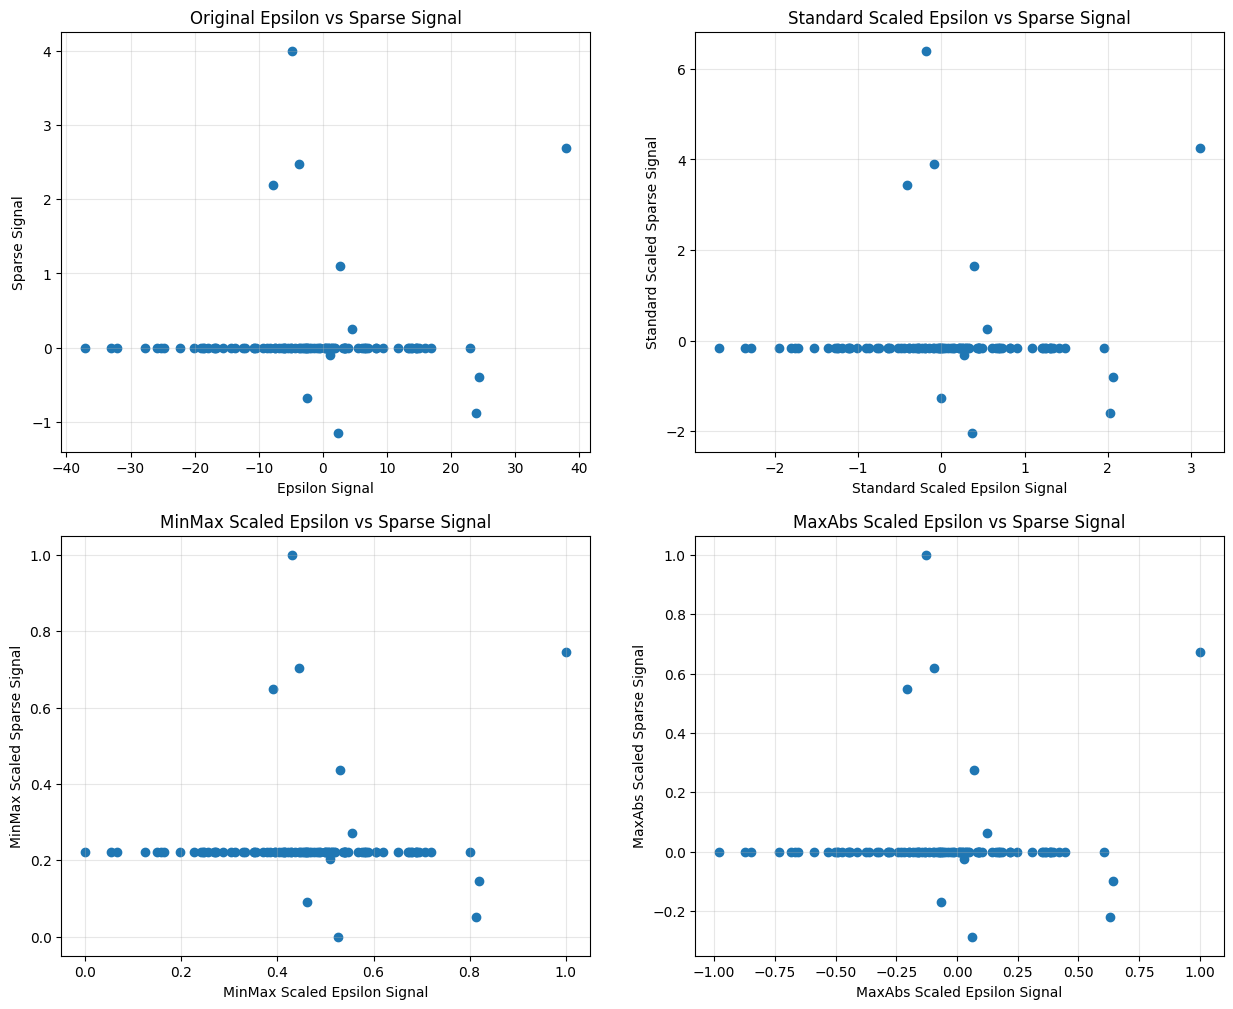

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].scatter(epsilon, sparse_signal)
axes[0,0].set_title('Original Epsilon vs Sparse Signal')
axes[0,0].set_xlabel('Epsilon Signal')
axes[0,0].set_ylabel('Sparse Signal')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(epsilon_std, sparse_std)
axes[0,1].set_title('Standard Scaled Epsilon vs Sparse Signal')
axes[0,1].set_xlabel('Standard Scaled Epsilon Signal')
axes[0,1].set_ylabel('Standard Scaled Sparse Signal')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].scatter(epsilon_minmax, sparse_minmax)
axes[1,0].set_title('MinMax Scaled Epsilon vs Sparse Signal')
axes[1,0].set_xlabel('MinMax Scaled Epsilon Signal')
axes[1,0].set_ylabel('MinMax Scaled Sparse Signal')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(epsilon_maxabs, sparse_maxabs)
axes[1,1].set_title('MaxAbs Scaled Epsilon vs Sparse Signal')
axes[1,1].set_xlabel('MaxAbs Scaled Epsilon Signal')
axes[1,1].set_ylabel('MaxAbs Scaled Sparse Signal')
axes[1,1].grid(True, alpha=0.3)
